In [367]:
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

<AxesSubplot:>

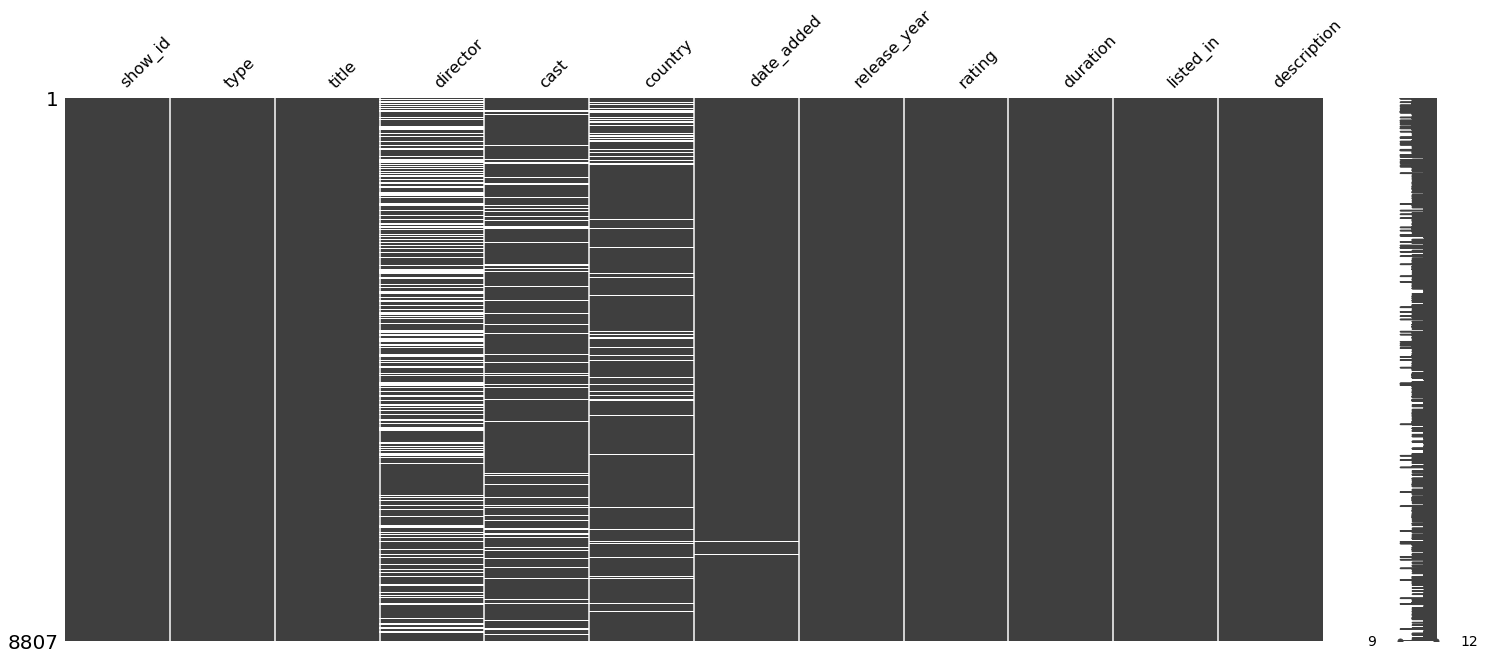

In [368]:
# 데이터 불러오기
DATA_PATH = './data/'
df = pd.read_csv(DATA_PATH + 'netflix_titles.csv')

# 데이터 확인
print(df.head()) ## 데이터 로드 확인
msno.matrix(df) ## 데이터 null 유무 확인

In [369]:
# df_actors = df[['cast']]
# actors = df_actors['cast'].str.split(',')
# titles = df['title', df['cast'].str.split(',')]

In [370]:
data = pd.DataFrame(df, {
    'title',
    'cast'
})

In [371]:
## null 값을 포함한 데이터 삭제
print(df.size)
df = df.dropna(how = 'any', axis = 0)
print(df.size)

105684
63984


In [372]:
# print(df.size)
# df = df.dropna()
# print(df.size)

<AxesSubplot:>

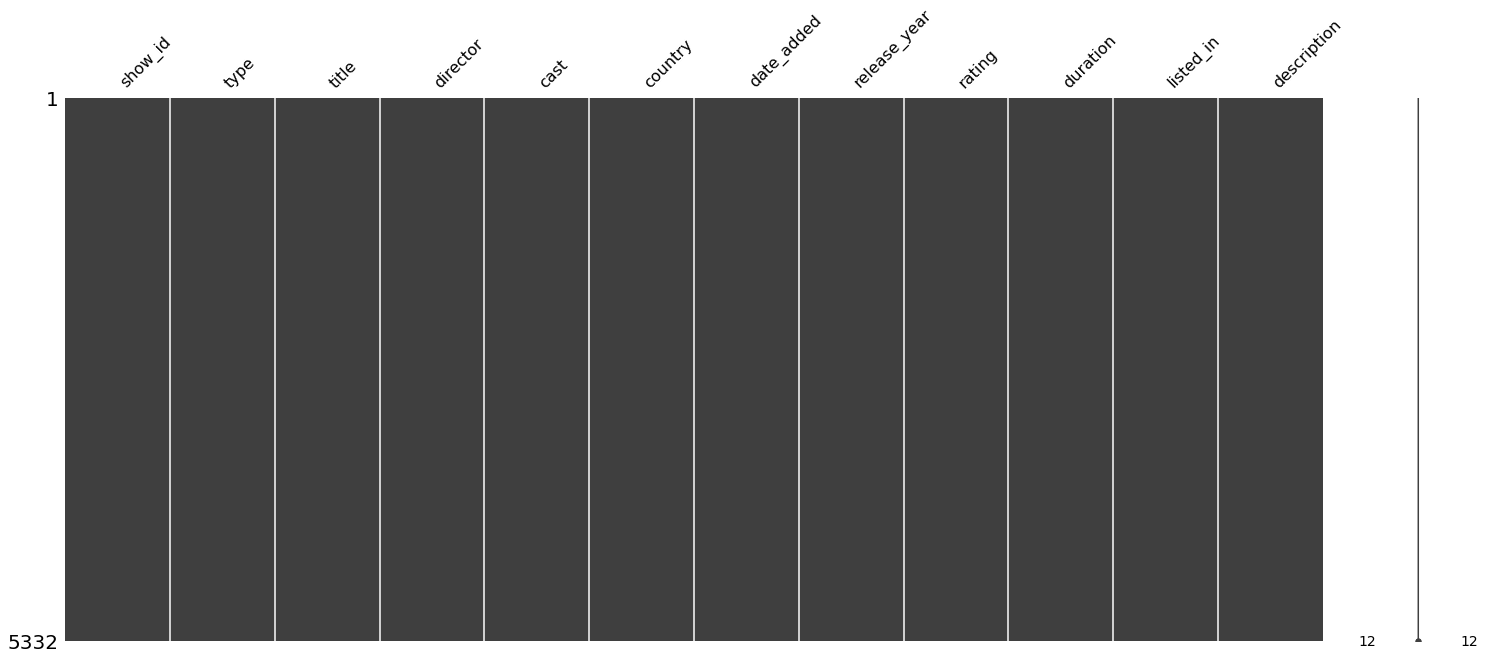

In [373]:
msno.matrix(df)

In [374]:
## 배우의 영화 출연 횟수
# df_actors = df[['cast']]
# actors = df_actors['cast'].str.split(',')
# print(actors)
# actor_check = dict()
# for i in range(len(actors)):
# 	# if type(actors[i]) != list:
# 	# 	continue
#
# 	for j in range(len(actors[i])):
# 		actors[i][j] = actors[i][j].strip() ## 공백 제거
#
# 		if actors[i][j] not in actor_check: ## 배우가 이미 있는 경우
# 			actor_check[actors[i][j]] = []
# 		elif actors[i][j] in actor_check:
# 			actor_check[actors[i][j]] += []

In [375]:
##1 나라 별 영화 타입 당 출연한 배우의 수 평균값
df1 = df[['type', 'cast', 'country']].groupby(['type', 'country', 'cast']).value_counts('cast')
print(df1)
# df = df.groupby(['type', 'cast'])
# print(df)


type     country                                     cast                                                                                                                                                                                                                                                                       
Movie    , France, Algeria                           Khaled Abol El Naga, Souad Massi, Suhail Haddad, Malak Ermileh, Maisa Abd Elhadi, Walid Abdul Salam, Nisreen Faour, Areen Omari                                                                                                                                                1
         Argentina                                   Adrián Suar, Soledad Villamil, Gabriela Toscano, Alan Sabbagh, Darío Barassi, Magela Zanotta, Betiana Blum                                                                                                                                                                     1
                           

In [376]:
##2 나라 별 영화 타입 당 출연한 배우의 수 평균값
df2 = df[['type', 'cast', 'country']]
df2.groupby(['type']).value_counts()
df2.groupby(['type', 'country']).value_counts('cast')
# df2.groupby(['type', 'country', 'cast']).count()
# df2 = df[['type', df['cast'].map(lambda x: len(x.split(','))), 'country']]

type     country                                     cast                                                                                                                                                             
Movie    , France, Algeria                           Khaled Abol El Naga, Souad Massi, Suhail Haddad, Malak Ermileh, Maisa Abd Elhadi, Walid Abdul Salam, Nisreen Faour, Areen Omari                                      1
         Argentina                                   Luis Brandoni, China Zorrilla, Antonio Gasalla, Julio De Grazia, Betiana Blum, Monica Villa, Juan Manuel Tenuta, Andrea Tenuta, Cecilia Rossetto, Enrique Pinti      2
                                                     Agustín Aristarán                                                                                                                                                    2
                                                     Franco Masini, Yamila Saud, Victorio D'Alessandro, Andrea Frigerio, Gera

In [377]:
##3 나라 별 영화 타입 당 출연한 배우의 수 평균값
df3_subset = df[['type', 'cast', 'country']]
df3_subset[(df3_subset['type'] == 'Movie')]

,type,cast,country
7,Movie,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin..."
9,Movie,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States
12,Movie,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic"
24,Movie,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India
27,Movie,"Adam Sandler, Kevin James, Chris Rock, David S...",United States
...,...,...,...
8801,Movie,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan"
8802,Movie,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States
8804,Movie,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States
8805,Movie,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States


<AxesSubplot:>

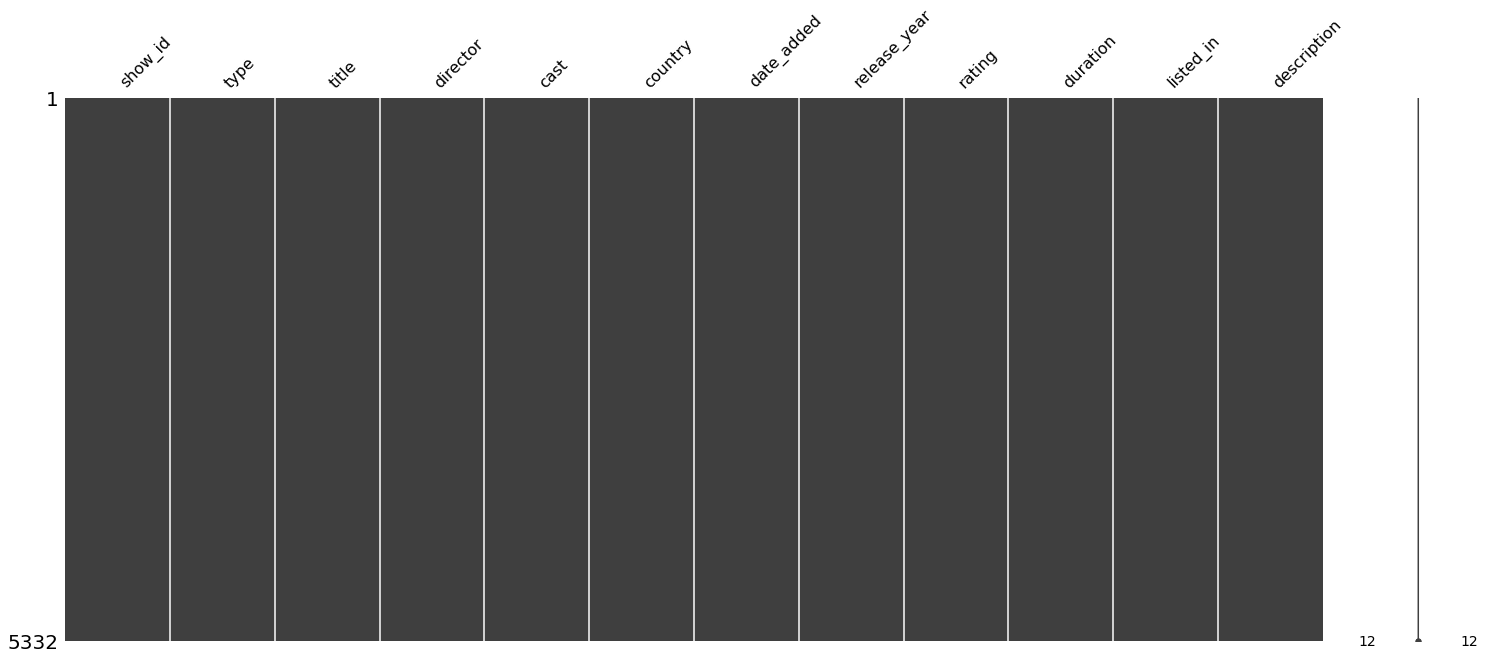

In [378]:
## 기존 df 에서 null 값이 아닌 row 만 가져오는 쿼리
df = df[(df["director"].notnull()) & (df['cast'].notnull())]

## null이 없는 데이터 셋 확인
msno.matrix(df)

In [379]:
## 원하는 데이터 생성
### 개봉 나라 별 타입 수를 나타내는 그래프
df[['type', 'country']].groupby([ 'type' ])['country'].value_counts()

type     country                                                      
Movie    United States                                                    1819
         India                                                             868
         United Kingdom                                                    164
         Canada                                                            104
         Egypt                                                              90
                                                                          ... 
TV Show  United Kingdom, Germany, United States, France                      1
         United Kingdom, Ireland, United States                              1
         United Kingdom, United States, Spain, Germany, Greece, Canada       1
         United States, Ireland                                              1
         United States, Israel, Italy, South Africa                          1
Name: country, Length: 637, dtype: int64

In [427]:
df = df[['type', 'country']]
print(df)

data = df.groupby([ 'type' ])['country'].value_counts()
# a = list(data.index)
# b = list(data.values)
# df = df.groupby([ 'type' ])['country']
# df.insert(2, 'count', count, True)
# print(df)

new_df = dict()
new_df['Movie'] = dict()
new_df['TV Show'] = dict()

for idx, values in enumerate(data):
    print(data.index[idx], values)
    type = data.index[idx][0]
    countries = data.index[idx][1].split(', ')

    for country in countries:
        if not new_df[country]:


         type                                            country
7       Movie  United States, Ghana, Burkina Faso, United Kin...
8     TV Show                                     United Kingdom
9       Movie                                      United States
12      Movie                            Germany, Czech Republic
24      Movie                                              India
...       ...                                                ...
8801    Movie                       United Arab Emirates, Jordan
8802    Movie                                      United States
8804    Movie                                      United States
8805    Movie                                      United States
8806    Movie                                              India

[5332 rows x 2 columns]
('Movie', 'United States') 1819
('Movie', 'India') 868
('Movie', 'United Kingdom') 164
('Movie', 'Canada') 104
('Movie', 'Egypt') 90
('Movie', 'Nigeria') 84
('Movie', 'Spain') 84
('Movie', 'Indon

title


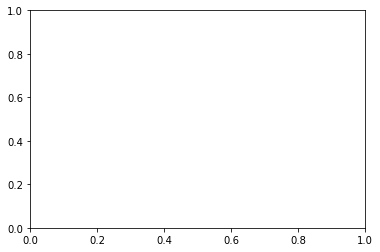

In [381]:
fig, ax = plt.subplots()
d_country = data.values
d_type = data.index[0]
print(d_type)